# Capstone Project Batch: B Group: 3                                                                      

### Members: Tanisha Jain , Priya Bhardwaj, Aman Bhardwaj, Satyam Sharma and Suneetha Vemula 

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st


In [61]:
carSalesData = pd.read_csv('Car_sales_details_p3.csv')
salesStatus = pd.read_csv('sales_Status_p3.csv')
stateRegionMapping = pd.read_csv('State_region_mapping_p3.csv')


In [62]:
carSalesData.head(3)


,Sales_ID,name,year,selling_price,km_driven,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1,Maruti Swift Dzire VDI,2014,450000,145500,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,New York,New York City,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5
2,3,Honda City 2017-2020 EXi,2006,158000,140000,Illinois,Chicago,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5


In [63]:
salesStatus.head(3)

,Sales_ID,sold
0,1,Y
1,2,Y
2,3,Y


In [64]:
stateRegionMapping.head(3)

,Region,State or Province
0,Central,Illinois
1,Central,Indiana
2,Central,Iowa


In [65]:
carSalesData.shape 

(7906, 15)

In [66]:
salesStatus.head(3)

,Sales_ID,sold
0,1,Y
1,2,Y
2,3,Y


In [67]:
salesStatus.shape

(7906, 2)

In [68]:
stateRegionMapping.head(3)

,Region,State or Province
0,Central,Illinois
1,Central,Indiana
2,Central,Iowa


In [69]:
stateRegionMapping.shape

(49, 2)

# Merging the three dataframes and saving it into a new csv file

Merging datasets CarSalesData and SalesStatus on attribute salesID and then mapping the regions using the stateRegionMapping data. After merging, the shape of the MergedCarSalesData will be (7906, 18). The brand attribute has been engineered into the merged dataset by extracting the first words from the names of the car.

In [70]:
mergedCarSalesData = pd.merge(carSalesData,salesStatus,how='inner',on='Sales_ID')
mergedCarSalesData.head(3)

,Sales_ID,name,year,selling_price,km_driven,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold
0,1,Maruti Swift Dzire VDI,2014,450000,145500,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5,Y
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,New York,New York City,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5,Y
2,3,Honda City 2017-2020 EXi,2006,158000,140000,Illinois,Chicago,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5,Y


In [71]:
keys = list(stateRegionMapping['State or Province'])
values = list(stateRegionMapping['Region'])
state_dict = {keys[i]: values[i] for i in range(len(keys))}
state_dict

{'Illinois': 'Central',
 'Indiana': 'Central',
 'Iowa': 'Central',
 'Kansas': 'Central',
 'Michigan': 'Central',
 'Minnesota': 'Central',
 'Missouri': 'Central',
 'Nebraska': 'Central',
 'North Dakota': 'Central',
 'Oklahoma': 'Central',
 'South Dakota': 'Central',
 'Texas': 'Central',
 'Wisconsin': 'Central',
 'Connecticut': 'East',
 'Delaware': 'East',
 'District of Columbia': 'East',
 'Maine': 'East',
 'Maryland': 'East',
 'Massachusetts': 'East',
 'New Hampshire': 'East',
 'New Jersey': 'East',
 'New York': 'East',
 'Ohio': 'East',
 'Pennsylvania': 'East',
 'Rhode Island': 'East',
 'Vermont': 'East',
 'West Virginia': 'East',
 'Alabama': 'South',
 'Arkansas': 'South',
 'Florida': 'South',
 'Georgia': 'South',
 'Kentucky': 'South',
 'Louisiana': 'South',
 'Mississippi': 'South',
 'North Carolina': 'South',
 'South Carolina': 'South',
 'Tennessee': 'South',
 'Virginia': 'South',
 'Arizona': 'West',
 'California': 'West',
 'Colorado': 'West',
 'Idaho': 'West',
 'Montana': 'West',
 'Ne

In [72]:
mergedCarSalesData['region'] = mergedCarSalesData['State or Province'].map(state_dict)

In [73]:
mergedCarSalesData.head(3)

,Sales_ID,name,year,selling_price,km_driven,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold,region
0,1,Maruti Swift Dzire VDI,2014,450000,145500,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5,Y,East
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,New York,New York City,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5,Y,East
2,3,Honda City 2017-2020 EXi,2006,158000,140000,Illinois,Chicago,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5,Y,Central


In [74]:
brand=[]
for i in range(mergedCarSalesData.shape[0]):
    brand.append(mergedCarSalesData['name'][i].split()[0])

In [75]:
brand

['Maruti',
 'Skoda',
 'Honda',
 'Hyundai',
 'Maruti',
 'Hyundai',
 'Maruti',
 'Maruti',
 'Toyota',
 'Ford',
 'Renault',
 'Maruti',
 'Maruti',
 'Maruti',
 'Mahindra',
 'Maruti',
 'Hyundai',
 'Maruti',
 'Hyundai',
 'Mahindra',
 'Honda',
 'Maruti',
 'Maruti',
 'Tata',
 'Maruti',
 'Maruti',
 'Chevrolet',
 'Maruti',
 'Maruti',
 'Maruti',
 'Maruti',
 'Hyundai',
 'Maruti',
 'Maruti',
 'Maruti',
 'Hyundai',
 'Datsun',
 'Tata',
 'Maruti',
 'Jeep',
 'Honda',
 'Honda',
 'Maruti',
 'Maruti',
 'Maruti',
 'Toyota',
 'Toyota',
 'Mercedes-Benz',
 'Honda',
 'Mitsubishi',
 'Honda',
 'Maruti',
 'Honda',
 'Toyota',
 'Toyota',
 'Audi',
 'Toyota',
 'Audi',
 'Mercedes-Benz',
 'Tata',
 'Hyundai',
 'Hyundai',
 'Maruti',
 'Ford',
 'Maruti',
 'Volkswagen',
 'Honda',
 'Maruti',
 'Volkswagen',
 'Maruti',
 'Maruti',
 'Hyundai',
 'Maruti',
 'Toyota',
 'Maruti',
 'Maruti',
 'Volkswagen',
 'Toyota',
 'Ford',
 'BMW',
 'Maruti',
 'Datsun',
 'Maruti',
 'Maruti',
 'Hyundai',
 'Maruti',
 'Maruti',
 'Volkswagen',
 'Hyundai'

In [76]:
mergedCarSalesData['brand']=brand

In [77]:
mergedCarSalesData.head(2)

,Sales_ID,name,year,selling_price,km_driven,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold,region,brand
0,1,Maruti Swift Dzire VDI,2014,450000,145500,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5,Y,East,Maruti
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,New York,New York City,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5,Y,East,Skoda


In [78]:
mergedCarSalesData.shape

(7906, 18)

In [79]:
mergedCarSalesData.to_csv('mergedCarSales.csv')

In [80]:
mergedCarSalesData['mileage'].head()

0     23.4 kmpl
1    21.14 kmpl
2     17.7 kmpl
3     23.0 kmpl
4     16.1 kmpl
Name: mileage, dtype: object

In [81]:
for i in range(len(mergedCarSalesData)):
    mergedCarSalesData['mileage'][i] = mergedCarSalesData['mileage'][i].split()[0]
    mergedCarSalesData['engine'][i] = mergedCarSalesData['engine'][i].split()[0]
    mergedCarSalesData['max_power'][i] = mergedCarSalesData['max_power'][i].split()[0]


<ipython-input-81-8987e95fb8c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergedCarSalesData['mileage'][i] = mergedCarSalesData['mileage'][i].split()[0]
<ipython-input-81-8987e95fb8c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergedCarSalesData['engine'][i] = mergedCarSalesData['engine'][i].split()[0]
<ipython-input-81-8987e95fb8c3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergedCarSalesData['max_power'][i] = mer

In [82]:
mergedCarSalesData.engine = mergedCarSalesData.engine.astype('int64')
mergedCarSalesData.max_power = mergedCarSalesData.max_power.astype('float')
mergedCarSalesData.mileage = mergedCarSalesData.mileage.astype('float')

#### Assigning dummy values to strings

In [83]:
province_dict = {'District of Columbia': 1, 'New York' :2 , 'Illinois': 3, 'California' : 4,'Texas':5, 'Massachusetts':6, 
              'Washington':7, 'Georgia':8,'North Carolina':9, 'Florida':10, 'Pennsylvania':11, 'Michigan':12, 'Iowa':13,
              'Oregon':14, 'New Mexico':15, 'Maryland':16, 'Montana':17, 'Arkansas':18,'Arizona':19, 'Maine':20, 
              'Vermont':21, 'New Jersey':22, 'Connecticut':23,'Oklahoma':24, 'Tennessee':25, 'Alabama':26, 'Wisconsin':27,
              'South Carolina':28,'New Hampshire':29, 'Idaho':30, 'Minnesota':31, 'Ohio':32, 'Kansas':33, 'Utah':34,
              'Virginia':35, 'Nebraska':36, 'West Virginia':37, 'Colorado':38, 'Indiana':39,'Kentucky':40, 'Missouri':41, 
              'North Dakota':42, 'Rhode Island':43,'Louisiana':44, 'Wyoming':45, 'Nevada':46, 'Mississippi':47, 
              'Delaware':48,'South Dakota':49}

region_dict = {'East':1, 'Central':2, 'West':3, 'South':4}

transmission_dict = {'Manual' : 1 , 'Automatic' : 2}

seller_type_dict = {'Individual' : 1, 'Dealer' : 2, 'Trustmark Dealer' : 3}

owner_dict = {'First Owner':1,'Second Owner':2, 'Third Owner':3,'Fourth and Above Owner':4, 'Test Drive Car':5}

fuel_dict = {'Diesel':1, 'Petrol':2, 'LPG':3, 'CNG':4}

In [84]:
dummy_data = pd.get_dummies(mergedCarSalesData, columns=['sold'], drop_first=True)

In [85]:
dummy_data['State or Province'] = dummy_data['State or Province'].map(province_dict)
dummy_data['region'] = dummy_data['region'].map(region_dict)
dummy_data['transmission'] = dummy_data['transmission'].map(transmission_dict)
dummy_data['seller_type'] = dummy_data['seller_type'].map(seller_type_dict)
dummy_data['fuel'] = dummy_data['fuel'].map(fuel_dict)
dummy_data['owner'] = dummy_data['owner'].map(owner_dict)
dummy_data.head(3)

,Sales_ID,name,year,selling_price,km_driven,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,region,brand,sold_Y
0,1,Maruti Swift Dzire VDI,2014,450000,145500,1,Washington,1,1,1,1.0,23.40,1248,74.00,5,1,Maruti,1
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,2,New York City,1,1,1,2.0,21.14,1498,103.52,5,1,Skoda,1
2,3,Honda City 2017-2020 EXi,2006,158000,140000,3,Chicago,2,1,1,3.0,17.70,1497,78.00,5,2,Honda,1


In [86]:
dummy_data.dtypes


Sales_ID               int64
name                  object
year                   int64
selling_price          int64
km_driven              int64
State or Province      int64
City                  object
fuel                   int64
seller_type            int64
transmission           int64
owner                float64
mileage              float64
engine                 int64
max_power            float64
seats                  int64
region                 int64
brand                 object
sold_Y                 uint8
dtype: object

## a.	Which variables are significant in predicting the price of a used car?

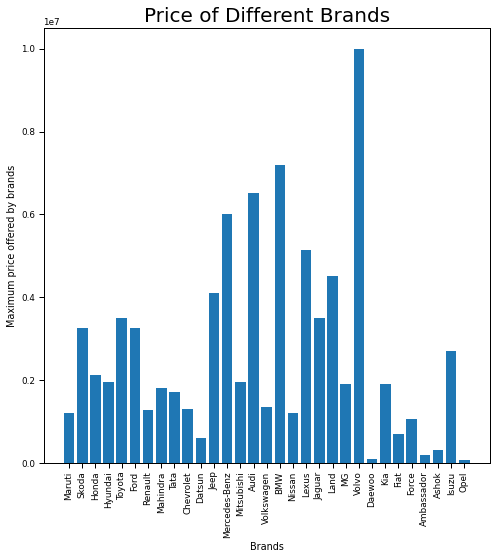

In [87]:
plt.figure(figsize=(8,8))
plt.bar(mergedCarSalesData['brand'],mergedCarSalesData['selling_price'])
plt.xlabel('Brands')
plt.ylabel('Maximum price offered by brands')
plt.title('Price of Different Brands',fontsize=20)
plt.xticks(rotation=90)
plt.show()

The above bar plot shows the maximum price of cars of every brand. It can be seen that Volvo offers the maximum price of car, followed by BMW, Audi and Mercedes-Benz. Daewoo, Ambassador and Opel come at the lowest positions.

In [88]:
auto=mergedCarSalesData[mergedCarSalesData['transmission']=='Automatic'].selling_price.mean()
man=mergedCarSalesData[mergedCarSalesData['transmission']=='Manual'].selling_price.mean()
auto,man

(1882972.1268011527, 462819.1249817917)

In [89]:
mergedCarSalesData[mergedCarSalesData['transmission']=='Automatic'].selling_price.describe()

count    1.041000e+03
mean     1.882972e+06
std      1.641287e+06
min      7.500000e+04
25%      6.450000e+05
50%      1.100000e+06
75%      2.711000e+06
max      1.000000e+07
Name: selling_price, dtype: float64

In [90]:
mergedCarSalesData[mergedCarSalesData['transmission']=='Manual'].selling_price.describe()

count    6.865000e+03
mean     4.628191e+05
std      2.975717e+05
min      2.999900e+04
25%      2.500000e+05
50%      4.099990e+05
75%      6.100000e+05
max      3.200000e+06
Name: selling_price, dtype: float64

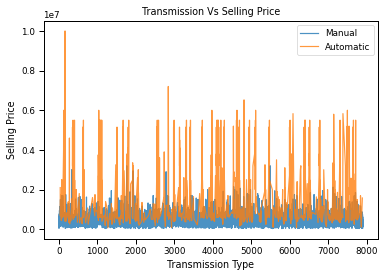

In [91]:
plt.plot(mergedCarSalesData[mergedCarSalesData['transmission']=='Manual'].selling_price,alpha=0.8)
plt.plot(mergedCarSalesData[mergedCarSalesData['transmission']=='Automatic'].selling_price,alpha=0.8)

plt.legend(['Manual','Automatic'])
plt.xlabel('Transmission Type')
plt.ylabel('Selling Price')
plt.title('Transmission Vs Selling Price')
plt.show()

The above line plot helps us in comparing the prices of Manual and Automatic cars. The Manual cars pricing is of a lower range, whereas Automatic Cars have a higher price distribution.

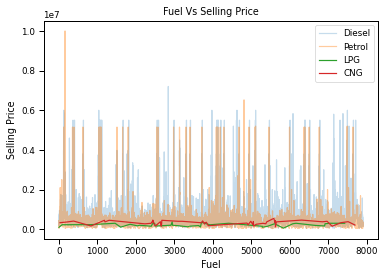

In [92]:
plt.plot(mergedCarSalesData[mergedCarSalesData['fuel']=='Diesel'].selling_price,alpha=0.25)
plt.plot(mergedCarSalesData[mergedCarSalesData['fuel']=='Petrol'].selling_price,alpha=0.4)
plt.plot(mergedCarSalesData[mergedCarSalesData['fuel']=='LPG'].selling_price,alpha=1)
plt.plot(mergedCarSalesData[mergedCarSalesData['fuel']=='CNG'].selling_price,alpha=1)
plt.legend(["Diesel",'Petrol','LPG','CNG'])
plt.xlabel('Fuel')
plt.ylabel('Selling Price')
plt.title('Fuel Vs Selling Price')
plt.show()

The above line plot shows the price distribution of cars having different fuel attributes. The price ranges of Diesel and Petrol are near about same, with Diesel cars taking the upper range. LPG cars are having the lowest pricing range, followed by CNG Cars.

In [93]:
mergedCarSalesData[mergedCarSalesData['seller_type']=='Individual'].selling_price.describe()

count    6.563000e+03
mean     5.077058e+05
std      4.872721e+05
min      2.999900e+04
25%      2.500000e+05
50%      4.000000e+05
75%      6.250000e+05
max      1.000000e+07
Name: selling_price, dtype: float64

In [94]:
mergedCarSalesData[mergedCarSalesData['seller_type']=='Dealer'].selling_price.describe()

count    1.107000e+03
mean     1.459910e+06
std      1.576638e+06
min      6.000000e+04
25%      4.750000e+05
50%      7.000000e+05
75%      1.881999e+06
max      6.523000e+06
Name: selling_price, dtype: float64

In [95]:
mergedCarSalesData[mergedCarSalesData['seller_type']=='Trustmark Dealer'].selling_price.describe()

count    2.360000e+02
mean     8.018390e+05
std      5.080779e+05
min      2.250000e+05
25%      5.500000e+05
50%      6.500000e+05
75%      7.790000e+05
max      2.000000e+06
Name: selling_price, dtype: float64

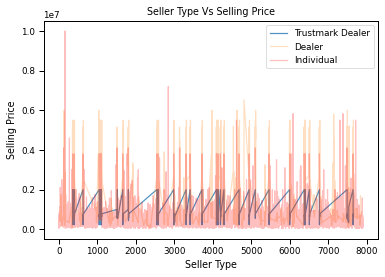

In [96]:
plt.plot(mergedCarSalesData[mergedCarSalesData['seller_type']=='Trustmark Dealer'].selling_price,alpha=0.8)
plt.plot(mergedCarSalesData[mergedCarSalesData['seller_type']=='Dealer'].selling_price,alpha=0.25)
plt.plot(mergedCarSalesData[mergedCarSalesData['seller_type']=='Individual'].selling_price,alpha=0.25,color='r')
plt.legend(['Trustmark Dealer','Dealer','Individual'])
plt.xlabel('Seller Type')
plt.ylabel('Selling Price')
plt.title('Seller Type Vs Selling Price')
plt.show()

The above pricing distribution clearly depicts that cars with Dealer seller type have the highest pricing range, and ones with Trustmark Dealers have the lowest price distribution. 

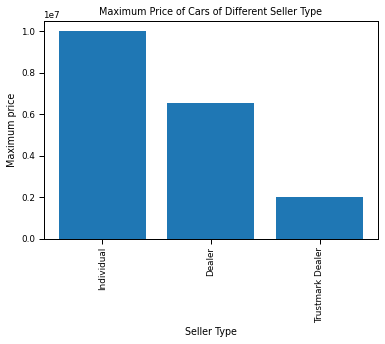

In [97]:
plt.bar(mergedCarSalesData['seller_type'],mergedCarSalesData['selling_price'])
plt.xticks(rotation=90)
plt.xlabel('Seller Type')
plt.ylabel('Maximum price')
plt.title('Maximum Price of Cars of Different Seller Type')
plt.show()

The bar plot shown above the maximum price offered to cars of different selling price. Individual type has the maximum price, followed by Dealer and then Trustmark Dealer.

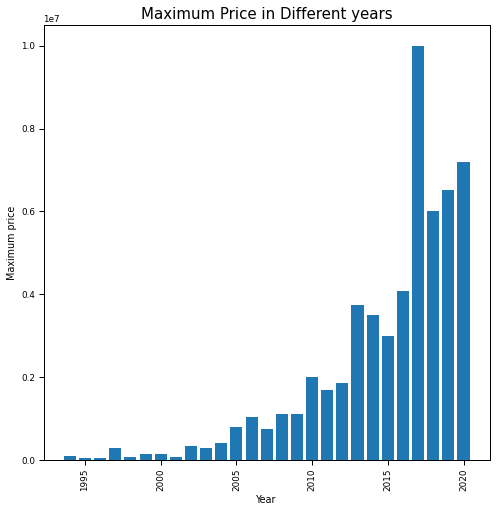

In [98]:
plt.figure(figsize=(8,8))
plt.bar(mergedCarSalesData['year'],mergedCarSalesData['selling_price'])
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Maximum price')
plt.title('Maximum Price in Different years',fontsize=15)
plt.show()

The above graph shows the maximum price offered in different years. The price keeps on increasing with every year.

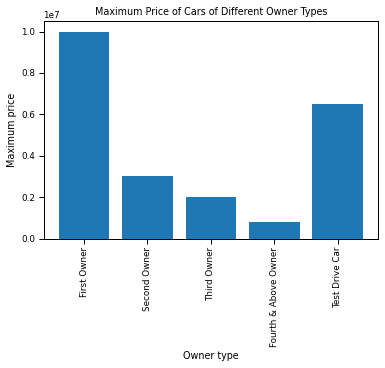

In [99]:
plt.bar(mergedCarSalesData['owner'],mergedCarSalesData['selling_price'])
plt.xticks(rotation=90)
plt.xlabel('Owner type')
plt.ylabel('Maximum price')
plt.title('Maximum Price of Cars of Different Owner Types')
plt.show()

The above price distribution shows that the maximum price was offered to cars of first owner. 

In [100]:
mergedCarSalesData.seats.unique()

array([ 5,  4,  7,  8,  6,  9, 10, 14,  2], dtype=int64)

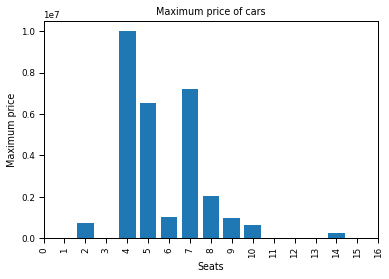

In [101]:
bars=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']
y_pos=np.arange(len(bars))
plt.bar(mergedCarSalesData['seats'],mergedCarSalesData['selling_price'])
plt.xticks(y_pos,bars,rotation=90)
plt.xlabel('Seats')
plt.ylabel('Maximum price')
plt.title('Maximum price of cars')
plt.show()

Cars with 4,7 and 5 seats have the maximum prices.

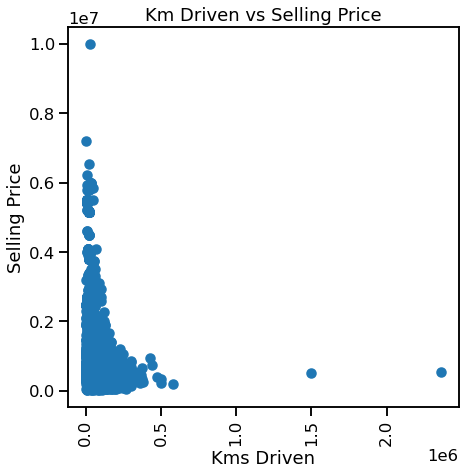

In [102]:
plt.figure(figsize=(7,7))
sns.set_context('talk')
plt.scatter(mergedCarSalesData['km_driven'],mergedCarSalesData['selling_price'])
plt.xticks(rotation=90)
plt.xlabel('Kms Driven')
plt.ylabel('Selling Price')
plt.title('Km Driven vs Selling Price')
plt.show()

The above scatter plot shows the relation between selling price and km driven of cars. As the km increases, the selling price decreases.

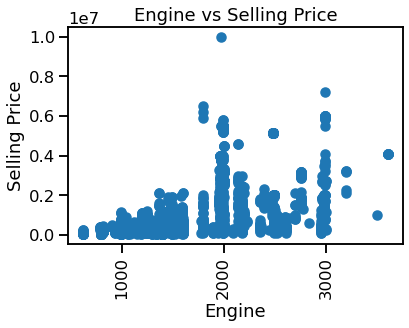

In [103]:

plt.scatter(mergedCarSalesData['engine'],mergedCarSalesData['selling_price'])
plt.xticks(rotation=90)
plt.xlabel('Engine')
plt.ylabel('Selling Price')
plt.title('Engine vs Selling Price')
plt.show()

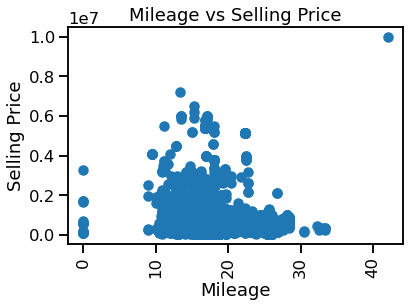

In [104]:

plt.scatter(mergedCarSalesData['mileage'],mergedCarSalesData['selling_price'])
plt.xticks(rotation=90)
plt.xlabel('Mileage')
plt.ylabel('Selling Price')
plt.title('Mileage vs Selling Price')
plt.show()

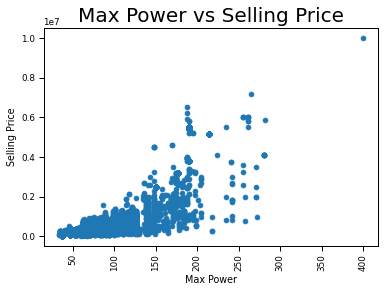

In [105]:
sns.set_context('paper')
plt.scatter(mergedCarSalesData['max_power'],mergedCarSalesData['selling_price'])
plt.xlabel('Max Power')
plt.ylabel('Selling Price')
plt.title('Max Power vs Selling Price',fontsize=20)
plt.xticks(rotation=90)
plt.show()

The above scatter plot shows the selling price distribution of cars having different maximum power. With increasing maximum power, the selling price keeps on increasing. There is a strong correlation between maximum power and selling price.

## b.	How well those variables describe the price of a car

In [106]:
dummy_data.corr()['selling_price']


Sales_ID            -0.012125
year                 0.412302
selling_price        1.000000
km_driven           -0.222158
State or Province    0.001732
fuel                -0.201221
seller_type          0.321389
transmission         0.590269
owner               -0.209083
mileage             -0.126280
engine               0.455682
max_power            0.749674
seats                0.041617
region               0.031903
sold_Y               0.018997
Name: selling_price, dtype: float64

<AxesSubplot:>

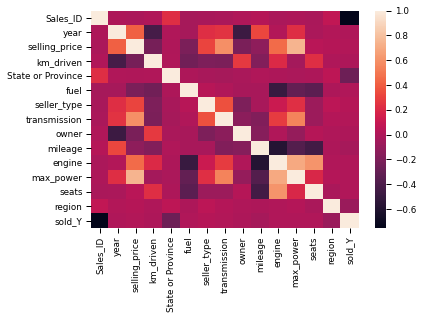

In [107]:
sns.heatmap(dummy_data.corr())

##### Variables significant in predicting the price of a used car : (Numerical columns): max_power, engine, year, kms_driven. (Categorical and Discrete Columns): year,fuel,transmission, fuel, owner, seller_type,seats.

## c. Which brands are selling most?

In [108]:
mergedCarSalesData.isnull().sum()  

Sales_ID             0
name                 0
year                 0
selling_price        0
km_driven            0
State or Province    0
City                 0
fuel                 0
seller_type          0
transmission         0
owner                0
mileage              0
engine               0
max_power            0
seats                0
sold                 0
region               0
brand                0
dtype: int64

In [109]:
mergedCarSalesData['sold'].value_counts()

N    5906
Y    2000
Name: sold, dtype: int64

In [110]:
sold = mergedCarSalesData[mergedCarSalesData['sold']=='Y']


In [111]:
print(sold.head(2))
print(sold.shape)

   Sales_ID                          name  year  selling_price  km_driven  \
0         1        Maruti Swift Dzire VDI  2014         450000     145500   
1         2  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   

      State or Province           City    fuel seller_type transmission  \
0  District of Columbia     Washington  Diesel  Individual       Manual   
1              New York  New York City  Diesel  Individual       Manual   

          owner  mileage  engine  max_power  seats sold region   brand  
0   First Owner    23.40    1248      74.00      5    Y   East  Maruti  
1  Second Owner    21.14    1498     103.52      5    Y   East   Skoda  
(2000, 18)


In [112]:
s = sold['brand'].value_counts()
d = mergedCarSalesData['brand'].value_counts()

In [113]:
s

Maruti           597
Hyundai          332
Mahindra         201
Tata             178
Toyota           126
Honda            124
Ford              92
Renault           56
Chevrolet         56
Volkswagen        39
Nissan            33
BMW               29
Jaguar            21
Skoda             20
Volvo             19
Mercedes-Benz     16
Datsun            16
Lexus             11
Jeep               9
Audi               9
Fiat               6
Mitsubishi         3
Kia                2
MG                 2
Force              1
Land               1
Daewoo             1
Name: brand, dtype: int64

Text(0.5, 1.0, '# Cars sold by Brands')

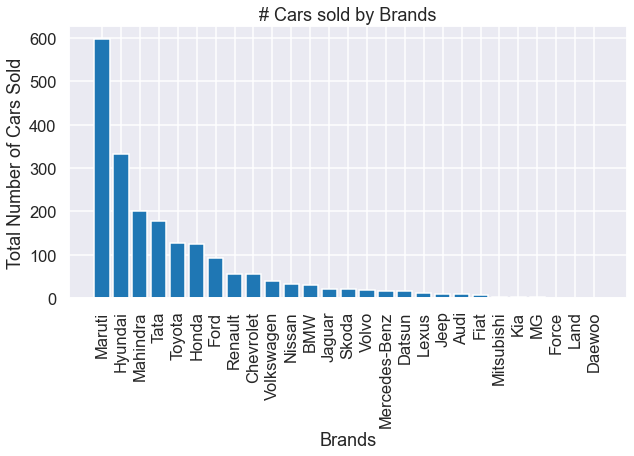

In [114]:
sns.set_style('darkgrid')
sns.set_context('talk')
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.bar(s.index,s.values)
plt.ylabel('Total Number of Cars Sold')
plt.xlabel('Brands')
plt.title('# Cars sold by Brands')

The above bar plot shows the number of cars sold of different brands. Maruti, Hyundai, Mahindra take the top three seats in having the most number of cars sold.

## d.	Are there specific locations selling more?

<BarContainer object of 4 artists>

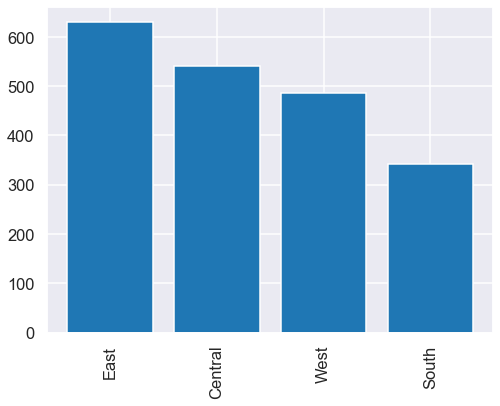

In [115]:
r=sold['region'].value_counts()
sns.set_style('darkgrid')
sns.set_context('talk')
plt.figure(figsize=(8,6))
plt.xticks(rotation=90)
plt.bar(r.index,r.values)

When looking for the number of cars sold in every region, the above bar plot gives a clear view. The cars sold in different regions in decreasing order are: East -> Central -> West -> South

In [116]:
mergedCarSalesData.transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

Text(0.5, 1.0, '# Cars sold in Different Regions')

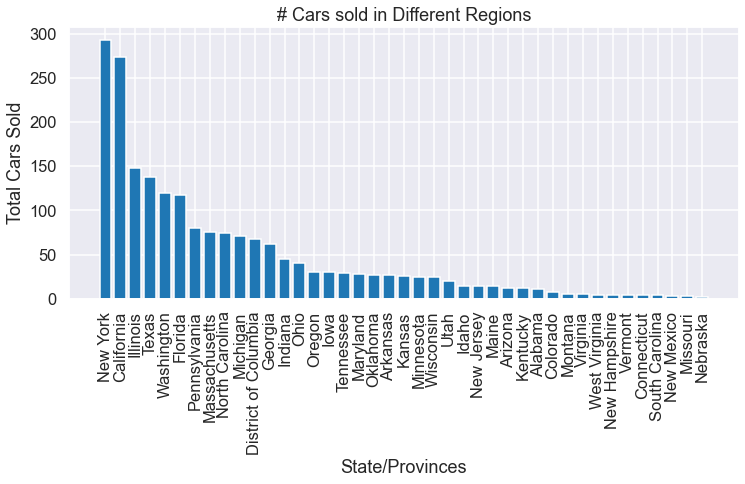

In [117]:
s=sold['State or Province'].value_counts()
sns.set_style('darkgrid')
sns.set_context('talk')
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
plt.bar(s.index,s.values)
plt.ylabel('Total Cars Sold')
plt.xlabel('State/Provinces')
plt.title('# Cars sold in Different Regions')

When looking for the number of cars sold in every State or Province, the above bar plot gives a clear view in decreasing order. New York and California have the highest number of cars sold. Nebraska, New Mexico and Missouri have the lowest number of cars sold.